# TODOs
* Plot weights (Gaussian function/kernel)
* Swap out equation for updating the activity rate
* Add external input

In [38]:
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

[[1.00000000e+00 9.80198673e-01 9.23116346e-01 ... 6.49934797e-20
  9.72098502e-21 1.39694394e-21]
 [9.80198673e-01 1.00000000e+00 9.80198673e-01 ... 4.17501006e-19
  6.49934797e-20 9.72098502e-21]
 [9.23116346e-01 9.80198673e-01 1.00000000e+00 ... 2.57675711e-18
  4.17501006e-19 6.49934797e-20]
 ...
 [6.49934797e-20 4.17501006e-19 2.57675711e-18 ... 1.00000000e+00
  9.80198673e-01 9.23116346e-01]
 [9.72098502e-21 6.49934797e-20 4.17501006e-19 ... 9.80198673e-01
  1.00000000e+00 9.80198673e-01]
 [1.39694394e-21 9.72098502e-21 6.49934797e-20 ... 9.23116346e-01
  9.80198673e-01 1.00000000e+00]]


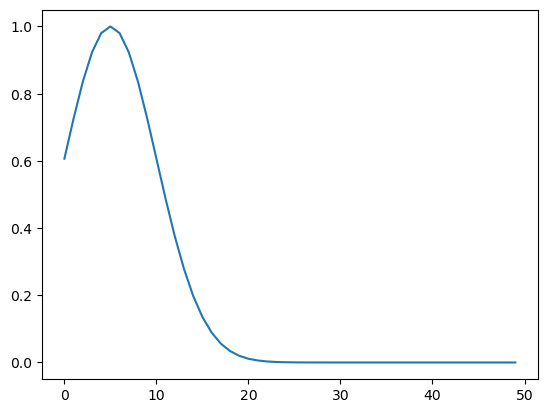

In [39]:
num_nodes = 50
num_time_steps = 10

w = np.zeros((num_nodes, num_nodes))
width = 0.2
for r in range(1, num_nodes + 1):
    for c in range(1, num_nodes + 1):
        w[r - 1][c - 1] = math.exp(-math.pow(r - c, 2) / 2 * math.pow(width, 2))

plt.plot(np.arange(num_nodes), w[5])

print(w)

In [40]:
external_input = np.zeros((num_nodes, num_time_steps))
external_input[20:25, 1] = np.array([1, 1, 1, 1, 1])
print(external_input)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [41]:
# activity rate per neuron for t timesteps
U = np.zeros((num_nodes, num_time_steps))
# assign random neuron state in the initial timestep
# U[:, 0] = np.random.default_rng().random(num_nodes) * 5
print('t=1, initial neuron states\n')
print(U[:, 0], '\n')

t=1, initial neuron states

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 



In [42]:
# print(np.shape(w))
# print(r[:, 0].reshape(50, 1))
# print(np.dot(w, r[:, 0]))
tau = 1
def nn_ode(t, Uc, W, I, tau):
    t = int(t)
    # transpose Uc so we get a column vector
    # ...
    return np.transpose(Uc).dot(W) + I[:, t]

dUdt = sp.integrate.solve_ivp(nn_ode, [0, num_time_steps - 1], U[:, 0], t_eval=np.arange(1, num_time_steps), args=(w, external_input, tau))
print(dUdt)
print(dUdt.y)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [1 2 3 4 5 6 7 8 9]
        y: [[ 3.162e-11  5.368e+02 ...  1.304e+34  2.223e+39]
            [ 3.004e-11  6.466e+02 ...  1.564e+34  2.667e+39]
            ...
            [ 1.652e-11  4.619e+02 ...  1.564e+34  2.667e+39]
            [ 1.221e-11  3.813e+02 ...  1.303e+34  2.223e+39]]
      sol: None
 t_events: None
 y_events: None
     nfev: 620
     njev: 0
      nlu: 0
[[ 3.16151451e-11  5.36752203e+02  9.37326374e+07  1.55948597e+13
   2.63581929e+18  4.48823632e+23  7.64274871e+28  1.30361238e+34
   2.22257887e+39]
 [ 3.00424097e-11  6.46581608e+02  1.12427444e+08  1.87100253e+13
   3.16271834e+18  5.38561285e+23  9.17091825e+28  1.56427361e+34
   2.66699183e+39]
 [ 2.35338808e-11  7.63902190e+02  1.32201543e+08  2.20072944e+13
   3.72058835e+18  6.33581741e+23  1.07890864e+29  1.84028759e+34
   3.13758108e+39]
 [ 1.16969803e-11  8.86722658e+02  1.52671055e+08  2.

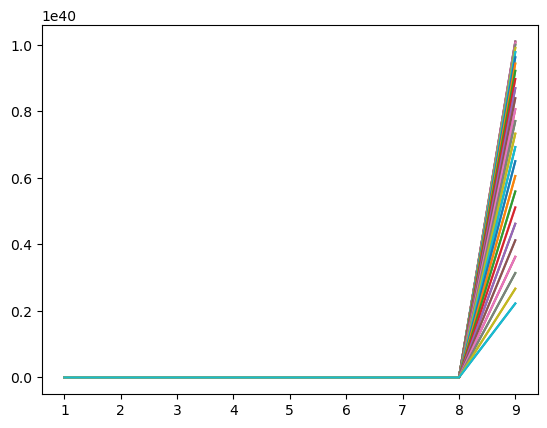

In [43]:

plt.plot(dUdt.t, np.transpose(dUdt.y))